In [8]:
import numpy as np
import os
import cv2
import random
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization
import cvlib as cv

In [9]:
directory=r'C:\Users\kumar\Downloads\archive (4)\Datasets\Datasets'
categories=[]
for i in os.listdir(directory):
    categories.append(i)
print(categories)

['car', 'truck']


In [10]:
img_size=200
data=[]

for fruits in categories:
    folder=os.path.join(directory,fruits)
    label=categories.index(fruits)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_array=cv2.imread(img_path)
        box,lb,conf=cv.detect_common_objects(img_array)
        for i,f in enumerate(box):
            start_x,start_y,end_x,end_y=f
            dd=np.copy(img_array[start_y:end_y,start_x:end_x])
            x,y,z=dd.shape
            if x==0 or y==0:
                continue
            df=cv2.resize(dd,(200,200))
            data.append([df,label])

In [11]:
len(data)

1679

In [12]:
random.shuffle(data)
features,labels=[],[]
for feature,label in data:
    features.append(feature)
    labels.append(label)
features=np.array(features,dtype='float')/255.0
labels=np.array(labels)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=42)
y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [14]:
epochs=50
lr=1e-3
batch_size=64
dims=(200,200,3)

In [15]:
img_aug=ImageDataGenerator(rotation_range=30, width_shift_range=0.15,
                         height_shift_range=0.15, shear_range=0.25, zoom_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

In [16]:
def building_model(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": 
        inputShape = (depth, height, width)
        chanDim = 1


    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

In [17]:
model=building_model(width=200,height=200,depth=3,classes=2)
optimizer=Adam(lr=lr,decay=lr/epochs)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.fit_generator(img_aug.flow(x_train, y_train, batch_size=batch_size),validation_data=(x_test,y_test),
                        steps_per_epoch=len(x_train) // batch_size,
                        epochs=epochs, verbose=1)


Epoch 1/50
20/20 [==============================] - 572s 29s/step - loss: 1.1352 - accuracy: 0.5137 - val_loss: 0.9110 - val_accuracy: 0.4970 - ETA: 12:46 - loss: 1.6441 - accuracy: 0.468 - ETA: 11:36 - loss: 1.5
Epoch 2/50
20/20 [==============================] - 181s 9s/step - loss: 0.8554 - accuracy: 0.5274 - val_loss: 0.7732 - val_accuracy: 0.4926
Epoch 3/50
20/20 [==============================] - 175s 9s/step - loss: 0.8126 - accuracy: 0.5609 - val_loss: 1.0713 - val_accuracy: 0.4970
Epoch 4/50
20/20 [==============================] - 173s 9s/step - loss: 0.7985 - accuracy: 0.5716 - val_loss: 1.2480 - val_accuracy: 0.5104
Epoch 5/50
20/20 [==============================] - 172s 9s/step - loss: 0.8456 - accuracy: 0.5328 - val_loss: 0.7959 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 192s 10s/step - loss: 0.8217 - accuracy: 0.5352 - val_loss: 0.7640 - val_accuracy: 0.5015
Epoch 7/50
20/20 [==============================] - 192s 10s/step - loss: 0.7917 

In [28]:
import cvlib as cv
import tensorflow as tf
vd=cv2.VideoCapture(0)
while vd.isOpened():
    ret,frame=vd.read()
    box,label,cong=cv.detect_common_objects(frame)
    for idx,f in enumerate(box):
        start_x,start_y,end_x,end_y=f
        cv2.rectangle(frame,(start_x,start_y),(end_x,end_y),(0,255,0),2)
        ff_crop=np.copy(frame[start_y:end_y,start_x:end_x])
        img_crop = cv2.resize(face_crop, (200,200))
        img_crop = img_crop.astype("float") / 255.0
        img_crop = tf.keras.preprocessing.image.array_to_img(img_crop)
        img_crop = np.expand_dims(img_crop, axis=0)
        
        conf=model.predict(img_crop)[0]
        print(conf)
        
        idx=np.argmax(conf)
        label=categories[idx]
        label = "{}: {:.2f}%".format(label, conf[idx] * 100)
        
        y=start_y-10 if start_y-10>10 else start_y +10
        if max(conf) > 0.9:
            cv2.rectangle(frame,(start_x,start_y),(end_x,end_y),(0,255,0),2)
            cv2.putText(frame, label, (start_x, y),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)
    cv2.imshow('cars and trucks',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vd.release()
cv2.destroyAllWindows()

In [18]:
def prediction(img):
    img=np.float32(img)
    pred_res=model.predict(img)
    return pred_res

In [54]:
test_directory=r'C:\Users\kumar\Downloads\archive (4)\Datasets\testing'
os.listdir(test_directory)

['car1.jpg', 'car2.jpg', 'car3.jpg', 'truck1.jpg', 'truck2.jpg', 'truck3.jpg']

In [66]:
test_set=[]
cp_test_set=[]
for img in os.listdir(test_directory):
    img_path=os.path.join(test_directory,img)
    img_array=cv2.imread(img_path)
    box,label,conf=cv.detect_common_objects(img_array)
    for i,f in enumerate(box):
        start_x,start_y,end_x,end_y=f
        cp=np.copy(img_array[start_y:end_y,start_x:end_x])
        cp=cv2.resize(cp,(200,200))
        cp.astype('float32')
        cp_test_set.append(cp)
    img_array=cv2.resize(img_array,(200,200))
    img_array.astype('float32')
    test_set.append(img_array)
test_set=np.array(test_set)/255.0
cp_test_set=np.array(cp_test_set)/255.0
len(test_set)    

6

In [68]:
results=prediction(test_set)
print(results)

[[6.9205230e-01 3.3829913e-01]
 [3.8253106e-04 9.9967372e-01]
 [1.9372021e-01 8.0877423e-01]
 [7.9846643e-02 9.4433743e-01]
 [8.2787111e-02 9.1965246e-01]
 [1.0292848e-02 9.9152726e-01]]


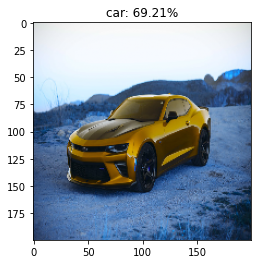

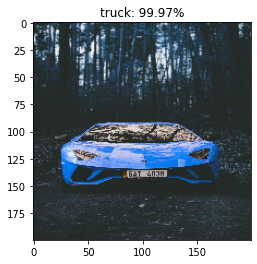

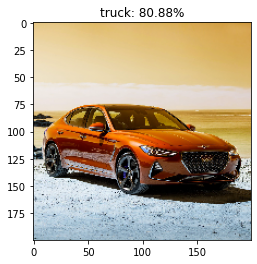

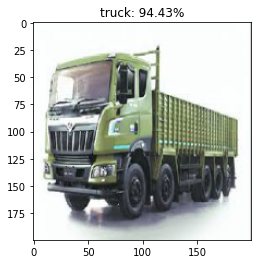

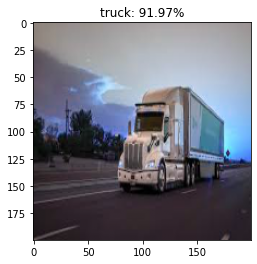

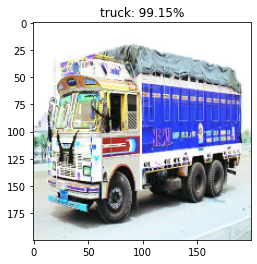

In [69]:
import matplotlib.pyplot as plt
for idx,arr in enumerate(results):
    f=np.argmax(arr)
    label=categories[f]
    label = "{}: {:.2f}%".format(label, max(arr) * 100)
    plt.imshow(test_set[idx])
    plt.title(label)
    plt.show()